In [1]:
import pandas as pd
import numpy as np
import re
import random
from datetime import datetime

# Reading the form responses
df = pd.read_csv('synthetic_data.csv')
data = df[['ISB_Service', 'bus_stop_board', 'bus_stop_alight', 'day_of_the_week', 'time_start', 'travel_duration', 'frequency', 'punctuality', 'cleanliness', 'safety', 'coverage', 'crowdedness']]
data

,ISB_Service,bus_stop_board,bus_stop_alight,day_of_the_week,time_start,travel_duration,frequency,punctuality,cleanliness,safety,coverage,crowdedness
0,A2,Opp NUSS,Ventus,Friday,09:30:00,15 - 20 minutes,1,3,2,3,1,2
1,D2,KR MRT,UTown,Thursday,09:30:00,10 - 15 minutes,3,4,3,4,4,4
2,A2,KR Bus Terminal,S17,Thursday,17:50:00,< 5 minutes,4,2,5,5,4,2
3,A1,PGP Terminal,CLB,Sunday,11:30:00,10 - 15 minutes,2,3,5,4,4,4
4,A1,KR MRT,LT27,Friday,07:50:00,< 5 minutes,2,5,4,4,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
60235,A1,KR Bus Terminal,LT27,Tuesday,14:42:17,5 - 10 minutes,2,4,4,3,3,5
60236,A1,KR MRT,CLB,Friday,13:34:00,10 - 15 minutes,4,2,5,1,4,2
60237,D2,PGP Terminal,UTown,Tuesday,09:38:07,15 - 20 minutes,3,4,5,3,4,2
60238,E,UTown,UTown,Friday,16:42:17,5 - 10 minutes,3,3,4,3,4,5


In [2]:
from sklearn.preprocessing import LabelEncoder

# Convert time_start to datetime format and then to minutes from midnight
data['time_start'] = pd.to_datetime(data['time_start'], format='%H:%M:%S')
data['time_start'] = data['time_start'].dt.hour * 60 + data['time_start'].dt.minute

# Encode categorical variables using Label Encoding
label_encoders = {}
for col in ['ISB_Service', 'bus_stop_board', 'bus_stop_alight', 'day_of_the_week','travel_duration']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

/var/folders/yh/jgy9kbnd1vncsn2ny8d4ggf40000gn/T/ipykernel_3430/218223513.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time_start'] = pd.to_datetime(data['time_start'], format='%H:%M:%S')
/var/folders/yh/jgy9kbnd1vncsn2ny8d4ggf40000gn/T/ipykernel_3430/218223513.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time_start'] = data['time_start'].dt.hour * 60 + data['time_start'].dt.minute
/var/folders/yh/jgy9kbnd1vncsn2ny8d4ggf40000gn/T/ipykernel_3430/218223513.py:11: SettingWithCopyWarni

In [3]:
from sklearn.preprocessing import StandardScaler

# Standardising time_start
scaler = StandardScaler()
data[['time_start']] = scaler.fit_transform(data[['time_start']])

/var/folders/yh/jgy9kbnd1vncsn2ny8d4ggf40000gn/T/ipykernel_3430/3880872753.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['time_start']] = scaler.fit_transform(data[['time_start']])


In [4]:
# Converting crowdedness from a categorical variable into a continuous variable

# Define the ranges for each level of crowdedness
capacity = 66
ranges = {
    1: (1, 13),
    2: (14, 26),
    3: (27, 40),
    4: (41, 53),
    5: (54, 66)
}

# Function to map 'crowdedness' level to a continuous value
def get_continuous_crowdedness(crowdedness_level):
    low, high = ranges[crowdedness_level]
    return np.random.randint(low, high + 1)  # Include 'high' in the range

data['crowdedness'] = data['crowdedness'].apply(get_continuous_crowdedness)

/var/folders/yh/jgy9kbnd1vncsn2ny8d4ggf40000gn/T/ipykernel_3430/111158568.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['crowdedness'] = data['crowdedness'].apply(get_continuous_crowdedness)


In [5]:
data

,ISB_Service,bus_stop_board,bus_stop_alight,day_of_the_week,time_start,travel_duration,frequency,punctuality,cleanliness,safety,coverage,crowdedness
0,1,14,21,0,-1.331252,1,1,3,2,3,1,15
1,4,7,19,4,-1.331252,0,3,4,3,4,4,46
2,1,6,16,4,0.982238,4,4,2,5,5,4,22
3,0,17,2,3,-0.776014,0,2,3,5,4,4,53
4,0,7,8,0,-1.793950,4,2,5,4,4,3,61
...,...,...,...,...,...,...,...,...,...,...,...,...
60235,0,6,8,5,0.112366,3,2,4,4,3,3,57
60236,0,7,2,0,-0.202269,0,4,2,5,1,4,16
60237,4,17,19,5,-1.294236,1,3,4,5,3,4,17
60238,5,19,19,0,0.667604,3,3,3,4,3,4,59


Mean Absolute Error: 14.197877071470014
Mean Squared Error: 300.12563588171275
Root Mean Squared Error: 17.324134491561555
R-squared (R²): -0.07143919725760739


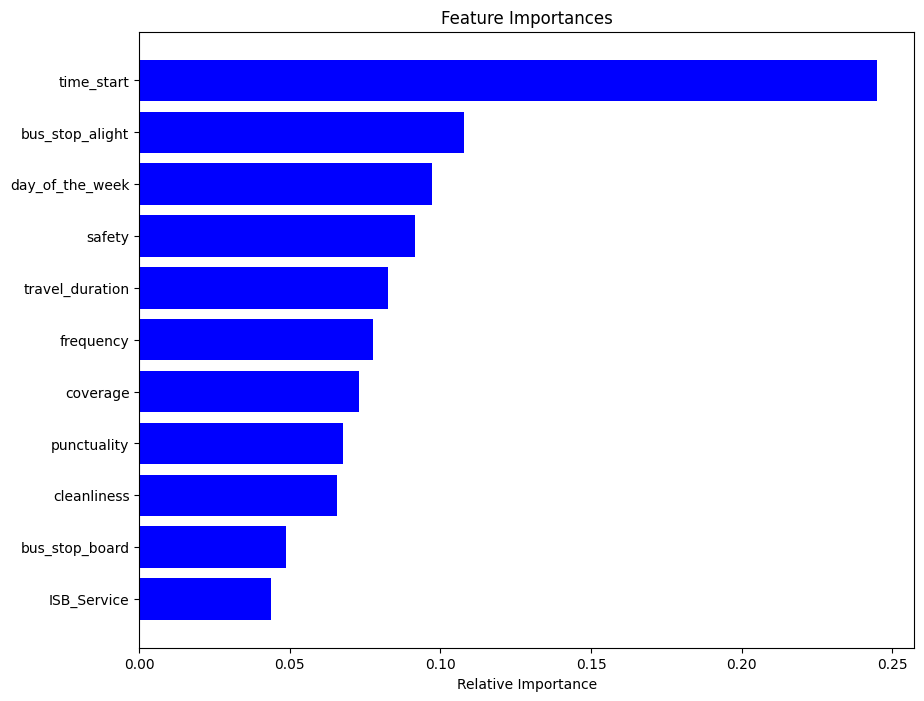

In [6]:
# Random Forest Regressor 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split data into features and target 
X = data.drop(columns=['crowdedness'])
y = data['crowdedness']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R²): {r2}")

# Display feature importance
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [7]:
# Hyperparameter Tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor()

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   6.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   6.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   7.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   7.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   7.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  13.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  13.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  13.9s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   6.8s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   6.8s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   6.8s
[CV] END max_depth=10, min_samples_split=2, n_est

/Users/LeeJingHuiMegan_1/Documents/Optimizing-Public-Transport-Data/.venv/lib/python3.9/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


Mean Absolute Error: 13.601962026951279
Mean Squared Error: 277.79539694032917
Root Mean Squared Error: 16.66719523316173
R-squared (R²): 0.008279062116131275


/Users/LeeJingHuiMegan_1/Documents/Optimizing-Public-Transport-Data/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


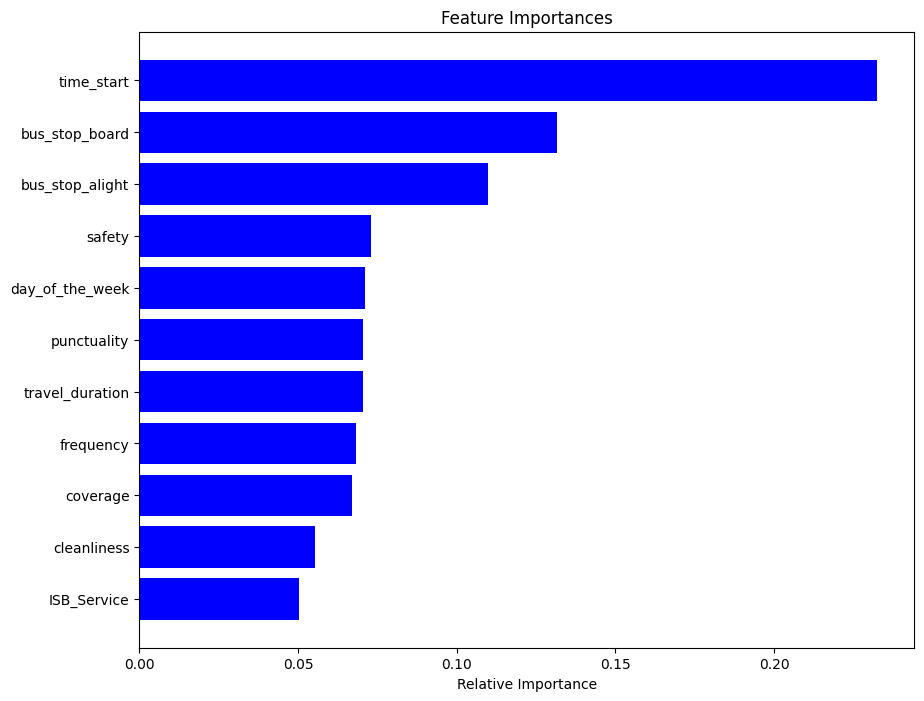

In [8]:
# Random Forest Regression after hyperparameter tuning
predictions = best_model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R²): {r2}")

feature_importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Key Features: bus_stop_board, time_start, frequency, bus_stop_alight

In [11]:
# Feature selection
data_fs = data[['bus_stop_board', 'time_start', 'bus_stop_alight', 'crowdedness']]

# Split data into features and target 
X = data_fs.drop(columns=['crowdedness'])
y = data_fs['crowdedness']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   2.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   4.9s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   2.6s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   2.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   4.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   5.0s
[CV] END max_depth=10, min_samples_split=5, n_est

In [12]:
predictions = best_model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error: 13.633270956256487
Mean Squared Error: 279.34682081026796
Root Mean Squared Error: 16.71367167352129
R-squared (R²): 0.0027405270925231484


/Users/LeeJingHuiMegan_1/Documents/Optimizing-Public-Transport-Data/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
